## Check List 7.1. Demo - White board sweeping
* In this demo file, we will use two robots (Indy7, Panda) to sweep a white board, removing obstacles

* You need trained model to use ReachChecker
  - model/reach_svm/indy7.json
  - model/reach_svm/panda.json
  - 백업: 개인 이동식 하드디스크, 강준수

## set running directory to project source

In [1]:
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))
from pkg.utils.code_scraps import add_indy_sweep_tool, \
        use_current_place_point_only, use_current_sub_binders_only, \
        finish_L_shape, set_l_shape_object, ModeSwitcher, double_sweep_motions

## init combined robot config

In [2]:
from pkg.controller.combined_robot import *
from pkg.project_config import *

crob = CombinedRobot(robots_on_scene=[
    RobotConfig(0, RobotType.indy7, ((0.3,-0.4,0), (0,0,np.pi/2)),
                INDY_IP)]
              , connection_list=[False])

connection command:
indy0: False


## create scene builder

In [3]:
from pkg.geometry.builder.scene_builder import SceneBuilder
s_builder = SceneBuilder(None)
# s_builder.reset_reference_coord(ref_name="floor")

## detect robot and make geometry scene

In [4]:
xyz_rpy_robots = {"indy0": ((0,0,0), (0,0,np.pi))}
crob.update_robot_pos_dict(xyz_rpy_robots=xyz_rpy_robots)
gscene = s_builder.create_gscene(crob, start_rviz=False)

Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


## init planning pipeline

In [5]:
from pkg.planning.scene import PlanningScene
pscene = PlanningScene(gscene, combined_robot=crob)

from pkg.planning.pipeline import PlanningPipeline
ppline = PlanningPipeline(pscene)

from pkg.ui.ui_broker import *

# start UI
ui_broker = UIBroker.instance()
ui_broker.initialize(ppline, s_builder)
ui_broker.start_server()

ui_broker.set_tables()

Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "pkg.ui.dash_launcher" (lazy loading)
 * Environment: production


```
open web ui on <your ip>:8050
click geometry items / Handles / Binders to highlight geometry on RVIZ
other functions may be buggy.. please report
```

## add environment

In [6]:
floor = gscene.create_safe(GEOTYPE.BOX, "floor", "base_link", (3,3,0.01), (0,0,0), 
                           rpy=(0,0,0), color=(0.8,0.8,0.8,0.5), display=True, fixed=True, collision=True)

   Use a production WSGI server instead.
 * Debug mode: off


In [7]:
gtems = s_builder.add_robot_geometries(color=(0,1,0,0.5), display=True, collision=True)

In [8]:
gscene.set_workspace_boundary( -1.5, 1.5, -1, 1, -0.1, 1.75)

## add indy tool

In [9]:
gscene = gscene
robot_name="indy0"
face_name="brush_face"

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_adapter".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0025), dims=(0.09, 0.09, 0.005), rpy=(0, 0, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_adapter_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0025), dims=(0.13, 0.13, 0.005), rpy=(0, 0, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge0".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0125), dims=(0.022, 0.036, 0.025), rpy=(0, 0, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge0_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0, 0, 0.0125), dims=(0.062, 0.076, 0.025), rpy=(0, 0, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_bar".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.053, 0, 0.068), dims=(0.011, 0.020, 0.15), rpy=(0, 1*pi/4, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_bar_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.053, 0, 0.068), dims=(0.051, 0.060, 0.15), rpy=(0, 1*pi/4, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge1".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1085,0,0.121), dims=(0.025, 0.036, 0.022), rpy=(0, 0, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_hindge1_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1085,0,0.121), dims=(0.025, 0.076, 0.062), rpy=(0, 0, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)

gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_brushbase".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1285,0,0.121), dims=(0.08, 0.08, 0.015), rpy=(0, pi/2, 0), color=(0.8, 0.8, 0.8, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.CYLINDER, name="{}_brushbase_col".format(robot_name),
                   link_name="{}_tcp".format(robot_name),
                   center=(0.1285,0,0.121), dims=(0.12, 0.12, 0.015), rpy=(0, pi/2, 0), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name=face_name, link_name="{}_tcp".format(robot_name),
                   center=(0.147,0,0.121), dims=(0.037, 0.10, 0.34), rpy=(np.pi, 0, pi), color=(1.0, 1.0, 0.94, 1),
                   collision=False, fixed=True)
gscene.create_safe(gtype=GEOTYPE.BOX, name="{}_col".format(face_name), link_name="{}_tcp".format(robot_name),
                   center=(0.127,0,0.121), dims=(0.057, 0.10, 0.36), rpy=(np.pi, 0, pi), color=(0.0, 0.8, 0.0, 0.5),
                   collision=True, fixed=True)


from pkg.planning.constraint.constraint_actor import Gripper2Tool, PlacePlane, SweepFramer, FixtureSlot
pscene.create_binder(bname="brush_face", gname="brush_face", _type=SweepFramer, point=(-gscene.NAME_DICT['brush_face'].dims[0]/2,0,0), 
                     rpy=(0,np.pi/2*1,0))

## find reachable area

In [10]:
from pkg.planning.constraint.constraint_actor import Gripper2Tool, PlacePlane, SweepFramer, FixtureSlot
from pkg.planning.constraint.constraint_common import MotionConstraint
from pkg.planning.constraint.constraint_subject import AbstractTask, AbstractObject
from pkg.planning.constraint.constraint_subject import SweepLineTask
from pkg.planning.constraint.constraint_subject import SweepFrame
from pkg.planning.motion.moveit.moveit_planner import MoveitPlanner
from pkg.planning.task.rrt import TaskRRT
from pkg.planning.constraint.constraint_common import sample_redundancy, combine_redundancy
from pkg.planning.sampling.node_sampling import make_state_param_hashable, UniformNodeSampler, PenaltyNodeSampler, GrowingSampler
from pkg.planning.task.custom_rules.sweep_entrance_control import SweepEntranceControlRule
import matplotlib.pyplot as plt
import math
import numpy as np
from collections import defaultdict

In [11]:
def get_jacobian(gscene, gtem, Q):
    Q_dict = list2dict(Q, gscene.joint_names)
    Jac = []
    for ij, jname in enumerate(gscene.joint_names):    
        joint = gscene.urdf_content.joint_map[jname]
        Tj = T_xyzrpy((joint.origin.xyz, joint.origin.rpy))
        T_link = get_tf(joint.parent, Q_dict, gscene.urdf_content)
        T_bj = np.matmul(T_link, Tj)
        zi = np.matmul(T_bj[:3,:3], joint.axis)        
        T_p = gtem.get_tf(Q_dict)
        dpi = T_p[:3,3]-T_bj[:3,3]
        zp = np.cross(zi, dpi)
        Ji= np.concatenate([zp, zi])
        Jac.append(Ji)
    Jac = np.array(Jac).transpose()
    return Jac

In [12]:
HOME_POSE = np.deg2rad([  0., -28.,  85.,  -0.,  57., -180])
TOOL_DIM = [0.08,0.08]
MOBILE_WIDTH_ERROR = 0
interval = 0.04
height_interval = 0.05
data = np.empty([1,6])
SINGULARITY_CUT = 0.01
HEIGHT_START = 0.25
HEIGHT_END = 0.35
DEPTH_START = 0.7
DEPTH_END = 1.5

min_max_dict_dict = defaultdict(dict)

z_min = int(np.round(HEIGHT_START/height_interval,5))
z_max = int(np.round(HEIGHT_END/height_interval,5))
for iter_height in range(z_min, z_max, 1):
    table_height = np.round(iter_height * height_interval, 5)
    print(table_height)
    x_min = int(np.round(DEPTH_START/interval,5))
    x_max = int(np.round(DEPTH_END/interval,5))
    y_min = 0
    y_max = -y_min + 1
    Qinit_dict = {}
    Traj_left_dict={}
    Traj_right_dict={}
    Traj_dict = {}
    plus_index_list = []
    minus_index_list = []
    plus_point_list = []
    minus_point_list = []
    
    for i in range(x_min, x_max, 1):
        track = gscene.create_safe(GEOTYPE.BOX, "track", "base_link", (0.5,0.6,0.01), (np.round(interval*i, 5), 0,table_height), rpy=(0,0,0), 
                                   color=(0.8,0.8,0.8,0.8), display=True, fixed=True, collision=False)
        track_face = gscene.copy_from(track, new_name="track_face", collision=False)
        track_face.dims = (track.dims[0]+1, track.dims[1]+1, track.dims[2])
        gscene.update_markers_all()

        TACK_WIDTH = 0.36
        TRACK_DIM = track_face.dims
        TRACK_NUM = np.ceil(np.divide(TRACK_DIM[0]-TOOL_DIM[0], TOOL_DIM[0])).astype(np.int)+1
        TRACK_STEP = TRACK_DIM[0]/TRACK_NUM
        TRC_THIC = TRACK_DIM[2]
        
        track_list = []
        wp_temp = (0,0,0)
        i_trc = 0
        wp1 = gscene.create_safe(GEOTYPE.BOX, "wp{}a".format(i_trc+1), "base_link", (TOOL_DIM[0]/2,TOOL_DIM[1]/2,TRC_THIC), 
                                 wp_temp, rpy=(0,0,0), 
                                 color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
        wp2 = gscene.create_safe(GEOTYPE.BOX, "wp{}b".format(i_trc+1), "base_link", (TOOL_DIM[0]/2,TOOL_DIM[1]/2,TRC_THIC), 
                                 wp_temp, rpy=(0,0,0), 
                                 color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")

        face = gscene.create_safe(GEOTYPE.BOX, "face{}".format(i_trc+1), "base_link", 
                                  (TACK_WIDTH,TRACK_DIM[1],TRC_THIC), 
                                 center=wp_temp,rpy=(0,0,0), 
                                 color=(0.8,0.2,0.2,0.2), display=True, fixed=True, collision=False, parent="track_face")
        track_list.append((wp1, wp2, face))
        gscene.update_markers_all()

        pscene.create_binder(bname="track_face", gname="track_face", _type=PlacePlane, point=None)

        sweep_list = []
        for i_t, track_tem in enumerate(track_list):
            wp1, wp2, face = track_tem
            sweep_ = pscene.create_subject(oname="sweep{}".format(i_t+1), gname="track_face", _type=SweepLineTask, 
                                           action_points_dict = {wp1.name: SweepFrame(wp1.name, wp1, [0,0,0.005], [0,0,0]),
                                                               wp2.name: SweepFrame(wp2.name, wp2, [0,0,0.005], [0,0,0])}, 
                                           clearance=[face])
            sweep_list.append(sweep_)

            mplan = MoveitPlanner(pscene)
            mplan.update_gscene()

            tplan = TaskRRT(pscene)
            tplan.prepare()
            ppline.set_motion_planner(mplan)
            ppline.set_task_planner(tplan)

            checkers_all = []
            mplan.motion_filters = checkers_all
#             gscene.show_pose(crob.home_pose)

            gtimer = GlobalTimer.instance()
            # initial_state = pscene.initialize_state(crob.home_pose)
            initial_state = pscene.initialize_state(HOME_POSE)

            # remove place points except for the current one
            use_current_place_point_only(pscene, initial_state)
            pscene.subject_name_list

            tplan.new_node_sampler = PenaltyNodeSampler(3, 1)
            tplan.parent_node_sampler = UniformNodeSampler(3)
            # tplan.parent_snode_sampler = GrowingSampler(3)

            tplan.custom_rule = SweepEntranceControlRule(pscene)

            end_state = initial_state.copy(pscene)
            end_state.set_binding_state(binding_state=(('sweep1','wp1a','brush_face','brush_face'),), pscene=pscene)
            Traj, end_state, error, success = ppline.test_connection(initial_state, end_state, redundancy_dict={'sweep1':{'wp1a':{}, 'brush_face':{}}},
                                                                    only_self_collision=True, timeout=0.5)
            
            print("CENTER: {}".format(track.center))
            if success:
                try:
                    gscene.show_motion(Traj)
                except Exception as e:
                    pass
                traj_index = (track_face.center[2],track_face.center[0], track_face.center[1])
                Traj_dict[tuple(traj_index)] = Traj
                
                gtem = gscene.NAME_DICT["brush_face"]
                Q0 = Traj[-1].copy()
                Q0dict = list2dict(Q0, gscene.joint_names)
                T0 = gtem.get_tf(Q0dict)
                

                DP = 0.001
                DIR = [0,1,0,0,0,0]
                Q=Q0
                singularity = False
                Traj_left = []
                for _ in range(1000):
                    Jac = get_jacobian(gscene, gtem, Q)
                    if np.min(np.abs(np.real(np.linalg.svd(Jac)[1]))) <= SINGULARITY_CUT:
                        singularity = True
                        print("singular")
                        break
                    Jinv = np.linalg.inv(Jac)
                    dQ=np.matmul(Jinv, np.multiply(DIR, DP))
                    Q = Q+dQ
                    Traj_left.append(Q)
                    dlim = np.subtract(RobotSpecs.get_joint_limits(RobotType.indy7), Q[:, np.newaxis])
                    if np.any(dlim[:,0] > 0):
                        print("joint min")
                        break
                    if np.any(dlim[:,1] < 0):
                        print("joint max")
                        break
                    if not mplan.validate_trajectory([Q]):
                        print("col")
                        break
                    Tnew = gtem.get_tf(list2dict(Q, gscene.joint_names))
                    if np.abs(T0[0,3]-Tnew[0,3])>0.01:
                        print("off")
                        break

                Traj_left_dict[tuple(traj_index)] = np.array(Traj_left)
                Q_dict = list2dict(Q, gscene.joint_names)
                T_p1 = gtem.get_tf(Q_dict)
                range_plus = np.floor(Tnew[1,3]*100)/100

                DP = -0.001
                DIR = [0,1,0,0,0,0]
                Q=Q0
                Traj_right = []
                singularity = False
                for _ in range(1000):
                    Jac = get_jacobian(gscene, gtem, Q)
                    if np.min(np.abs(np.real(np.linalg.svd(Jac)[1]))) <= SINGULARITY_CUT:
                        singularity = True
                        print("singular")
                        break
                    Jinv = np.linalg.inv(Jac)
                    dQ=np.matmul(Jinv, np.multiply(DIR, DP))
                    Q = Q+dQ
                    Traj_right.append(Q)
                    dlim = np.subtract(RobotSpecs.get_joint_limits(RobotType.indy7), Q[:, np.newaxis])
                    if np.any(dlim[:,0] > 0):
                        print("joint min")
                        break
                    if np.any(dlim[:,1] < 0):
                        print("joint max")
                        break
                    if not mplan.validate_trajectory([Q]):
                        print("col")
                        break
                    Tnew = gtem.get_tf(list2dict(Q, gscene.joint_names))
                    if np.abs(T0[0,3]-Tnew[0,3])>0.01:
                        print("off")
                        break
                Traj_right_dict[tuple(traj_index)] = np.array(Traj_right)
                Q_dict = list2dict(Q, gscene.joint_names)
                T_p2 = gtem.get_tf(Q_dict)
                range_minus = np.ceil(Tnew[1,3]*100)/100
                
                print((range_minus, range_plus))
                min_max_dict_dict[iter_height][i]=(range_minus, range_plus)
                plus_point_list.append([track_face.center[0], range_plus])
                minus_point_list.append([track_face.center[0], range_minus])             
     

0.25
CENTER: (0.68, 0, 0.25)
singular
joint min
(-0.15, 0.76)
CENTER: (0.72, 0, 0.25)
singular
joint max
(-0.05, 0.74)
CENTER: (0.76, 0, 0.25)
joint min
singular
(-0.72, 0.59)
CENTER: (0.8, 0, 0.25)
singular
joint min
(-0.14, 0.7)
CENTER: (0.84, 0, 0.25)
singular
joint max
(-0.04, 0.67)
CENTER: (0.88, 0, 0.25)
joint min
singular
(-0.63, 0.52)
CENTER: (0.92, 0, 0.25)
singular
joint max
(-0.01, 0.6)
CENTER: (0.96, 0, 0.25)
joint min
singular
(-0.55, 0.47)
CENTER: (1.0, 0, 0.25)
joint min
singular
(-0.5, 0.43)
CENTER: (1.04, 0, 0.25)
CENTER: (1.08, 0, 0.25)
CENTER: (1.12, 0, 0.25)
CENTER: (1.16, 0, 0.25)
CENTER: (1.2, 0, 0.25)
CENTER: (1.24, 0, 0.25)
CENTER: (1.28, 0, 0.25)
CENTER: (1.32, 0, 0.25)
CENTER: (1.36, 0, 0.25)
CENTER: (1.4, 0, 0.25)
CENTER: (1.44, 0, 0.25)
0.3
CENTER: (0.68, 0, 0.3)
joint min
singular
(-0.75, 0.57)
CENTER: (0.72, 0, 0.3)
singular
joint min
(-0.15, 0.73)
CENTER: (0.76, 0, 0.3)
singular
joint min
(-0.15, 0.71)
CENTER: (0.8, 0, 0.3)
joint min
singular
(-0.68, 0.53

In [13]:
dataset_path = os.path.join(os.environ["RNB_PLANNING_DIR"], 'src/scripts/demo_202107/dataset.npy')

In [14]:
from itertools import combinations

TOOL_WIDTH = 0.08
TOOL_DEPTH = 0.32

CRITICAL_WIDTH = 0.8


dataset = []
for hkey in sorted(min_max_dict_dict.keys()):
    min_max_dict = min_max_dict_dict[hkey]
    keys = sorted(min_max_dict.keys())
    key_combs = [(key,key) for key in keys]+list(combinations(keys, 2))

    height_goal = round(hkey*height_interval, 3)
    area_list = []
    width_list = []
    depth_list = []
    for k1, k2 in key_combs:
        k1, k2 = min(k1, k2), max(k1, k2)
        min_depth, max_depth = k1*interval, k2*interval
        minmax_list = np.array([v for k_, v in min_max_dict.items() if k1<=k_<=k2])
        max_neg, min_pos = np.round([np.max(minmax_list[:, 0]), np.min(minmax_list[:, 1])], 3)
        print("min_pos/max_neg: {}".format(min_pos, max_neg))
        width_sweep = round(min_pos-max_neg+TOOL_WIDTH, 3)
        depth_sweep = round(max_depth-min_depth+TOOL_DEPTH, 3)
        area_list.append([[max_depth, max_neg], [min_depth, min_pos], width_sweep, depth_sweep])
        width_list.append(width_sweep)
        depth_list.append(depth_sweep)

    optimal_dict = {}
    for area_tem in area_list:
        width_sweep, depth_sweep = area_tem[2:]
        if depth_sweep in optimal_dict:
            opt_old = optimal_dict[depth_sweep]
            width_old = opt_old[-2]
            if width_sweep < width_old:
                continue
        optimal_dict[depth_sweep] = area_tem
    optimal_list = sorted(optimal_dict.values(), key=lambda x: x[-1])
    opt_depth_sort = sorted(optimal_dict.keys())
    
    opt_depth_list = [opt_tem[-1] for opt_tem in optimal_list]
    opt_width_list = [opt_tem[-2] for opt_tem in optimal_list]
    idx_crit = max(np.argmin(np.abs(np.subtract(opt_width_list, CRITICAL_WIDTH))), int(len(opt_depth_list)/2))
    depth_criteria = opt_depth_sort[idx_crit]
    dataset.append((height_goal, depth_criteria, opt_depth_sort, optimal_list, width_list, area_list))
np.save(dataset_path, dataset)
print("depth_criteria: {}".format(depth_criteria))

min_pos/max_neg: 0.76
min_pos/max_neg: 0.74
min_pos/max_neg: 0.59
min_pos/max_neg: 0.7
min_pos/max_neg: 0.67
min_pos/max_neg: 0.52
min_pos/max_neg: 0.6
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.74
min_pos/max_neg: 0.59
min_pos/max_neg: 0.59
min_pos/max_neg: 0.59
min_pos/max_neg: 0.52
min_pos/max_neg: 0.52
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.59
min_pos/max_neg: 0.59
min_pos/max_neg: 0.59
min_pos/max_neg: 0.52
min_pos/max_neg: 0.52
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.59
min_pos/max_neg: 0.59
min_pos/max_neg: 0.52
min_pos/max_neg: 0.52
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.67
min_pos/max_neg: 0.52
min_pos/max_neg: 0.52
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.52
min_pos/max_neg: 0.52
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.52
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.47
min_pos/max_neg: 0.43
min_pos/max_neg: 0.43
min_pos/max_

In [15]:
import matplotlib.pyplot as plt

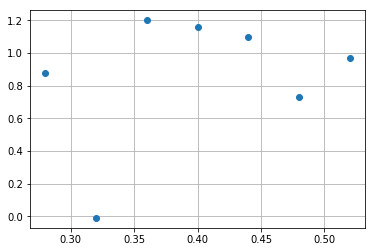

In [16]:
minmax = np.array([min_max_dict_dict[6][key] for key in keys])
plt.plot(np.multiply(keys, interval)-0.44, minmax[:,1]-minmax[:,0], 'o')
plt.grid()

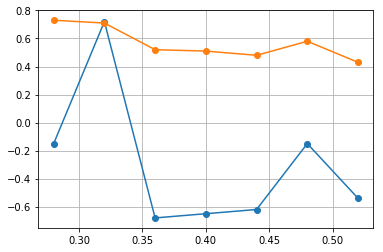

In [17]:
plt.plot(np.multiply(keys, interval)-0.44, minmax[:,0], '-o')
plt.plot(np.multiply(keys, interval)-0.44, minmax[:,1], '-o')
plt.grid()

In [17]:

#     cut_flag = False
#     for i in range(len(plus_point_list)-1):
#         if np.round(plus_point_list[i+1][0] - plus_point_list[i][0], 5) != interval:
#             cut_idx = i+1
#             cut_flag = True
#             break
#     if cut_flag:
#         minus_point_list = minus_point_list[0:cut_idx]
#         plus_point_list = plus_point_list[0:cut_idx]
    
#     idx = []
#     for j in range(len(plus_point_list)):
#         for k in range(len(plus_point_list)):
#             idx.append([j,k])

#     point_list = []
#     for j in range(len(idx)):
#         min_plus = 100
#         min_minus = -100
#         min_plus_idx = -1
#         min_minus_idx = -1
#         plus_idx = idx[j][0]
#         minus_idx = idx[j][1]

#         if plus_idx < minus_idx:
#             start_idx = plus_idx
#             end_idx = minus_idx
#         else:
#             start_idx = minus_idx
#             end_idx = plus_idx

#         for k in range(start_idx, end_idx + 1, 1):
#             if plus_point_list[k][1] <= min_plus:
#                 min_plus_idx = k
#                 min_plus = plus_point_list[k][1]
#             if minus_point_list[k][1] >= min_minus:
#                 min_minus_idx = k
#                 min_minus = minus_point_list[k][1]

#         for m in range(start_idx, end_idx + 1, 1):
#             for n in range(start_idx, end_idx + 1, 1):
#                  point_list.append([[plus_point_list[m][0], min_plus],[minus_point_list[n][0], min_minus]])           

#     point_no_dupl_list = []
#     for i in range(len(point_list)):
#         if point_list[i] not in point_no_dupl_list:
#             point_no_dupl_list.append(point_list[i])

#     able_point_list = []
#     for j in range(len(point_no_dupl_list)):
#         if (np.round(np.abs(point_no_dupl_list[j][0][0] - point_no_dupl_list[j][1][0]),3) % TOOL_DIM[0]) == 0:
#             able_point_list.append(point_no_dupl_list[j])

#     area_list = []
#     for j in range(len(able_point_list)):
#         corner1 = able_point_list[j][0]
#         corner2 = able_point_list[j][1]
#         depth = np.round(np.abs(able_point_list[j][0][0] - able_point_list[j][1][0])+ TOOL_DIM[0],3)
#         width = np.round(np.abs(able_point_list[j][0][1] - able_point_list[j][1][1]) + TOOL_DIM[1] - MOBILE_WIDTH_ERROR,3)
#         area_list.append([corner1, corner2, width, depth])

#     width_list = []
#     depth_list = []
#     for j in range(len(area_list)):
#         width_list.append(area_list[j][2])
#         depth_list.append(area_list[j][3])
#     width_list = sorted(list(set(width_list)))
#     depth_list = sorted(list(set(depth_list)))

#     done_list_d = []
#     optimal_index_d = []
#     done_list_w = []
#     optimal_index_w = []
#     for j in range(len(area_list)):
#         if area_list[j][2] not in done_list_d:
#             depth_max = area_list[j][3]
#             for k in range(j,len(area_list),1):
#                 if (area_list[k][2] == area_list[j][2]) & (area_list[k][3] > depth_max):
#                     depth_max = area_list[k][3]
#             for k in range(j,len(area_list),1):
#                 if (area_list[k][2] == area_list[j][2]) & (area_list[k][3] == depth_max):
#                     optimal_index_d.append(k)
#             done_list_d.append(area_list[j][2])
#     for j in range(len(area_list)):
#             if area_list[j][3] not in done_list_w:
#                 width_max = area_list[j][2]
#                 for k in range(j,len(area_list),1):
#                     if (area_list[k][3] == area_list[j][3]) & (area_list[k][2] > width_max):
#                         width_max = area_list[k][2]
#                 for k in range(j,len(area_list),1):
#                     if (area_list[k][3] == area_list[j][3]) & (area_list[k][2] == width_max):
#                         optimal_index_w.append(k)
#                 done_list_w.append(area_list[j][3])

#     optimal_list_d = []
#     optimal_list_w = []
#     for j in range(len(area_list)):
#         if j in optimal_index_d:
#             optimal_list_d.append(area_list[j])
#         if j in optimal_index_w:
#             optimal_list_w.append(area_list[j])

#     optimal_list = optimal_list_w
#     opt_width = []
#     opt_depth = []
#     for j in range(len(optimal_list)):
#         opt_width.append(optimal_list[j][2])
#         opt_depth.append(optimal_list[j][3])
#     opt_width_sort = sorted(list(set(opt_width)))
#     opt_depth_sort = sorted(list(set(opt_depth)))

#     depth_criteria = opt_depth[int(len(opt_depth)/2)]
# #     if depth_criteria > 2 * TOOL_DIM[0]:
# #         depth_criteria = opt_depth[int(len(opt_depth)/2)-1]
        
#     max_depth = np.max(opt_depth)
#     max_width = np.max(opt_width)

#     next_data = np.array([table_height, depth_criteria, opt_depth_sort, optimal_list, width_list, area_list])
#     next_data = next_data.reshape(1,-1)
#     data = np.append(data,next_data, axis=0)     
            
# data = np.delete(data, [0,0], axis=0)
# np.save('/home/ihhwang/dataset', data)
